In [4]:
import tensorflow as tf

#  Loading - "MNIST Data Set"

# Contatining Training Samples = 60,000 , Testing Samples = 10,000

In [5]:
mnist = tf.keras.datasets.mnist 

In [6]:
##unpacking the dataset into train and test datasets
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [7]:
x_train.shape

(60000, 28, 28)

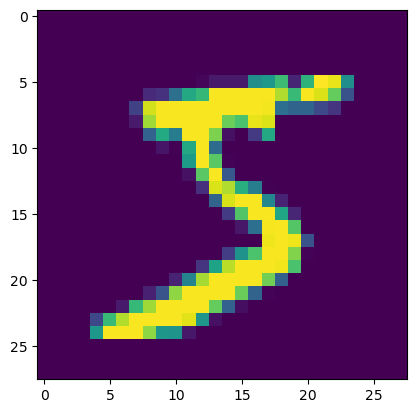

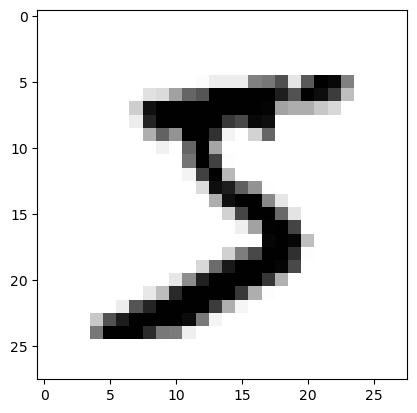

In [8]:
##just to check the graph, how data looks like
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show() ##in order to execute the graph
## however we don't know whether its color image or binary images
## so inorder to plot it change the configuration
plt.imshow(x_train[0], cmap = plt.cm.binary)

# Checking the values of each pixel

# Before Normalization

In [9]:
print(x_train[0])  ### before normalization

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

# As images are in Gray Level(1 channel ==>0 to 255),not Colored(RGB)

# Normalizing the data | Pre-Processing Step

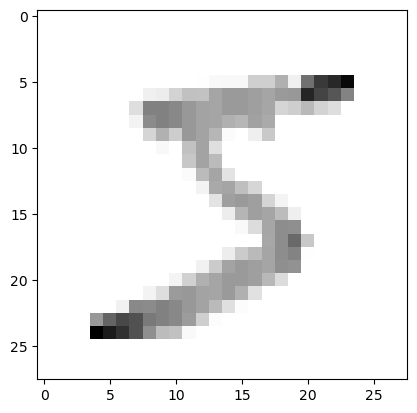

In [11]:
### might have noticed that, its gray image and values varies from 0 to 255
### in order to normalize it

x_train = tf.keras.utils.normalize(x_train,axis = 1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap = plt.cm.binary)

# After Normalization

In [12]:
print (x_train[0])  ## can see all values are now normalized

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [13]:
print(y_train[0])  ### just to check that we have labels inside our network

5


# Resizing the image to make it suitable for apply Convolution operation

In [14]:
import numpy as np 
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1) ### increasing one dimension for kernel operation
x_testr = np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)  ### increasing one dimension for kernel operation
print("training samples dimension",x_trainr.shape)
print("testing samples dimension",x_testr.shape)

training samples dimension (60000, 28, 28, 1)
testing samples dimension (10000, 28, 28, 1)


# Creating a Deep Neural Network

# Training on 60000 samples of MNIST handwritten dataset

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [19]:
### Creating a neural network now
model = Sequential()

##### First Convolution layer 0 1 2 3 (60000,28,28,1) 28-3_1 = 26x26
model.add(Conv2D(64,(3,3), input_shape = x_trainr.shape[1:])) ### only for first convolution layer to mention input layer size
model.add(Activation("relu"))## activation function to make it non-linear, <0,remove,>0
model.add(MaxPooling2D(pool_size=(2,2))) ## Maxpooling single maximum value of 2x2.

#### 2nd Convolution layer 26-3+1 = 24*24
model.add(Conv2D(64,(3,3)))   ## 2nd Convolution Layer
model.add(Activation("relu"))  ## activation function
model.add(MaxPooling2D(pool_size=(2,2))) ## Maxpooling

##### 3rd Convolution Layer
model.add(Conv2D(64,(3,3)))  # 24*24
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#### Fully Connected Layer # 1 20x20 = 400
model.add(Flatten()) ### before using fully connected layer, need to be flatten so that 2D to 1D
model.add(Dense(64))
model.add(Activation("relu"))


#### Fully Connected Layer # 2
model.add(Dense(32))
model.add(Activation("relu"))


#### last Fully Connected Layer, Output must be equal to number of classes, 10(0-9)
model.add(Dense(10)) ## this last dense layer must be equal to 10
model.add(Activation('softmax')) ### activation function is changed to Softmax(Class Probabilities)


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

In [21]:
print("Total Training Samples = ",len(x_trainr))

Total Training Samples =  60000


In [22]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer = "adam",metrics = ['accuracy'])

In [23]:
model.fit(x_trainr,y_train,epochs=5, validation_split = 0.3) ##Training my model

Epoch 1/5


1313/1313 [==============================] - 25s 17ms/step - loss: 0.3114 - accuracy: 0.9031 - val_loss: 0.1405 - val_accuracy: 0.9572
Epoch 2/5
1313/1313 [==============================] - 23s 18ms/step - loss: 0.0952 - accuracy: 0.9712 - val_loss: 0.1040 - val_accuracy: 0.9681
Epoch 3/5
1313/1313 [==============================] - 23s 18ms/step - loss: 0.0704 - accuracy: 0.9789 - val_loss: 0.0678 - val_accuracy: 0.9803
Epoch 4/5
1313/1313 [==============================] - 23s 17ms/step - loss: 0.0555 - accuracy: 0.9828 - val_loss: 0.0681 - val_accuracy: 0.9809
Epoch 5/5
1313/1313 [==============================] - 23s 18ms/step - loss: 0.0452 - accuracy: 0.9867 - val_loss: 0.0805 - val_accuracy: 0.9761


In [24]:
#### Evaluating on testing dataset MNIST
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test loss on 10,000 test samples",test_loss)
print("Validation Accuracy on 10,000 test samples",test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0630 - accuracy: 0.9823
Test loss on 10,000 test samples 0.06295362859964371
Validation Accuracy on 10,000 test samples 0.9822999835014343


In [24]:
#predictions = new_model.predict([x_test])  ## There is specialized method for efficiently saving our model, to name all important
### therefore instead of using new model loaded, for now only for predictions I am using simple model
predictions = model.predict([x_testr])

313/313 [==============================] - 2s 7ms/step


In [25]:
print(predictions)  ## actually these predictions are based on one hot encoding so these are old arrays, containing softmax problems

[[2.2518545e-06 7.5679768e-06 3.5520203e-05 ... 9.9959868e-01
  5.0110798e-06 1.9829006e-04]
 [5.1581091e-04 9.1249363e-05 9.9912637e-01 ... 6.1771170e-06
  3.6784888e-06 2.4543193e-04]
 [8.2043522e-07 9.9997115e-01 1.2616190e-06 ... 7.0362753e-06
  2.5751913e-07 5.7334250e-07]
 ...
 [6.2225451e-09 4.3788052e-07 3.9787569e-08 ... 8.6698810e-06
  1.4998510e-07 9.8535806e-05]
 [1.1639410e-07 4.8904214e-09 3.0432876e-08 ... 1.4260692e-08
  2.6968630e-07 4.5381412e-06]
 [2.0653573e-04 1.8881200e-06 1.0361493e-05 ... 5.5731493e-07
  2.4748695e-06 1.4220655e-04]]


In [26]:
## in order to understand, convert the predictions from one hot encoding, we need to use numpy for that
print(np.argmax(predictions[128])) ### so actually argmax will return the max. value index and find the value of it

8


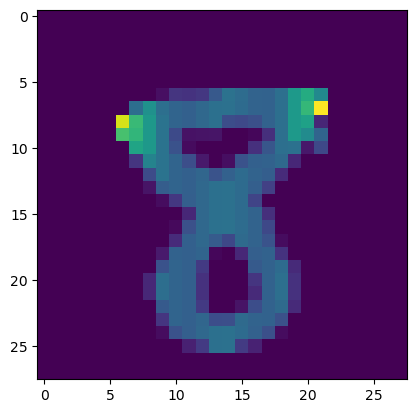

In [27]:
### now to check that answer is true or not
plt.imshow(x_test[128])

# Single image - digit Recognition

In [28]:
 import cv2

In [29]:
img = cv2.imread('8.png')

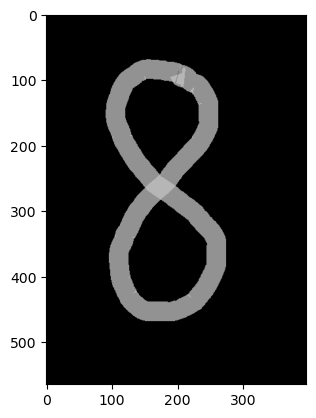

In [30]:
plt.imshow(img)

In [31]:
img.shape

(565, 397, 3)

In [32]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [33]:
gray.shape

(565, 397)

In [34]:
resized = cv2.resize(gray,(28,28),interpolation = cv2.INTER_AREA)

In [35]:
resized.shape

(28, 28)

In [36]:
newimg =tf.keras.utils.normalize(resized,axis = 1) ## 0 to 1 scaling

In [37]:
newimg = np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1) # kernel operation of convolution layer

In [38]:
newimg.shape

(1, 28, 28, 1)

In [39]:
predictions = model.predict(newimg)

1/1 [==============================] - 0s 170ms/step


In [40]:
print(np.argmax(predictions))

8
